In [2]:
#import utils
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
from statsmodels.graphics.mosaicplot import mosaic
import tkinter
from matplotlib.backends.backend_tkagg import (
    FigureCanvasTkAgg, NavigationToolbar2Tk)
# Implement the default Matplotlib key bindings.
from matplotlib.backend_bases import key_press_handler
from matplotlib.figure import Figure
from sklearn.neighbors import KernelDensity
from sklearn import datasets
from sklearn.decomposition import PCA
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)
plt.rcParams['figure.figsize'] = [4.5, 3.5]
#plt.rcParams['figure.dpi'] = 100



pd.options.display.max_rows = 2000
pd.options.display.max_columns = 100

### Not easy to interpret

Many researchers point out that box plots are not easy to interpret because they are not well aligned how the visual system works. For example, in the following box plot, does the left (Q1-Q2) or the right (Q2-Q3) region of the box contain more data?

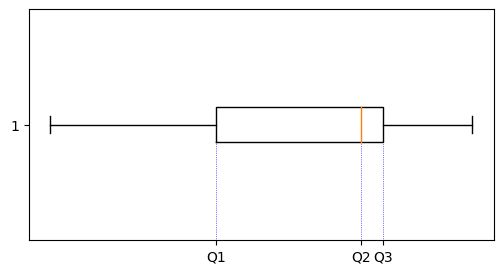

In [26]:
data = [1,2,3,4,5,6,6.3,6.4,6.5,6.6,7,8]
fig = plt.figure(1, figsize=(6, 3))
ax = fig.add_subplot(111)

quantiles = np.quantile(data, np.array([0.25, 0.50, 0.75]))
ax.vlines(quantiles, [0] * quantiles.size, [1] * quantiles.size,
          color='b', ls=':', lw=0.5, zorder=0)
ax.set_xticks(quantiles, labels=["Q1","Q2","Q3"])
ax.set_ylim(0.5, 1.5)

plt.boxplot(data, vert=False);

Various [research studies](https://psychologicabelgica.com/articles/10.5334/pb.az) show that students tend to think that the larger area contains more data points. Actually, the quartile ranges in a box plot roughly contain equal number of data points. The size of the area of a box plot represent the density of the data points not the number of data points. This seems to be counter intuitive since humans tend to associate larger/longer shapes with larger quantities however in a box plot the number of data points in quartiles are always the same (roughly) regardless of their relative sizes. Moreover, shorter segments represent higher densities and longer segments represent lower densities which is again counter intuitive.

### Hides the details of the data distribution

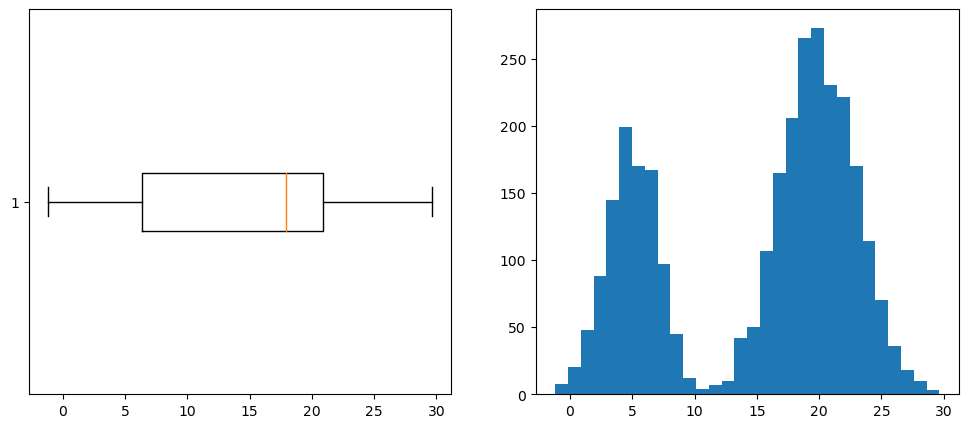

In [8]:
data = list(np.random.normal(5, 2, 1000)) + list(np.random.normal(20, 3, 2000))
f, axarr = plt.subplots(1,2)
f.set_size_inches(12,5)
axarr[0].boxplot(data, vert=False)
axarr[1].hist(data, 30);